To perform image processing on astronomical data, install astroquery and matplotlib library

In [ ]:
#installing astroquery library in python
!pip install astroquery

In [ ]:
import matplotlib.pyplot as plt

Get the Andromeda data (M31) from SDSSg Survey using Skyview

In [ ]:
from astroquery.skyview import SkyView

In [ ]:
SkyView.get_images('M31','SDSSg')
#this will generate a list with a list - fits file

[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x790a100debc0>]]

In [ ]:
#this will show info of the metadata - header and the data will be image or tabular data
hdu = SkyView.get_images('M31','SDSSg')[0][0]
hdu

In [ ]:
#Get the metadata using header
M31_Header = hdu.header
#Naxis will show the data stored within. in this case it is a 2d image

In [ ]:
#Get the pixels data from HDU
M31_pixels = hdu.data
M31_pixels

array([[5.4453125, 5.453125 , 5.4453125, ..., 7.4609375, 7.515625 ,
        7.4140625],
       [5.4375   , 5.453125 , 5.421875 , ..., 7.625    , 7.4453125,
        7.4453125],
       [5.4765625, 5.359375 , 5.4609375, ..., 7.4375   , 7.5625   ,
        7.46875  ],
       ...,
       [7.3984375, 7.3984375, 7.546875 , ..., 5.53125  , 5.671875 ,
        5.7578125],
       [7.46875  , 7.6171875, 7.5859375, ..., 5.6640625, 5.671875 ,
        5.5625   ],
       [7.53125  , 7.5078125, 7.5859375, ..., 5.53125  , 5.59375  ,
        5.5546875]], dtype=float32)

In [ ]:
#the type must be numpy array
type(M31_pixels)

numpy.ndarray

In [ ]:
#the shape was mentioned in the metadata as 300 x 300
M31_pixels.shape

(300, 300)

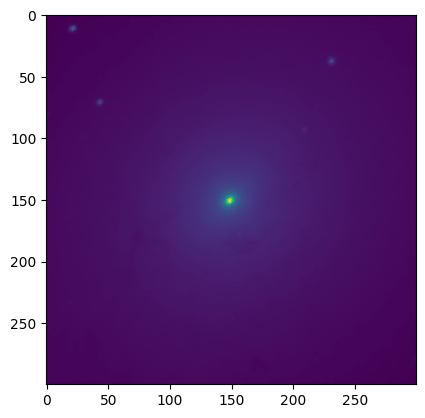

In [ ]:
#in order to visualize numpy array - use imshow()
#by default the colourmap(cmap) is viridis
plt.imshow(M31_pixels, cmap= 'viridis')

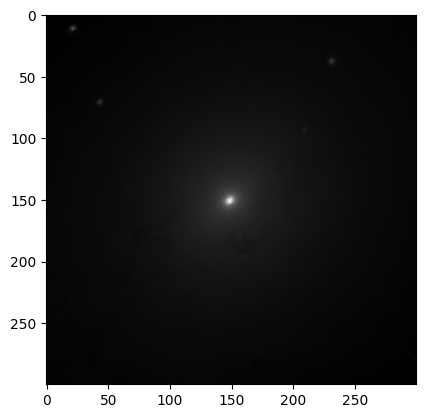

In [ ]:
plt.imshow(M31_pixels, cmap= 'gray')

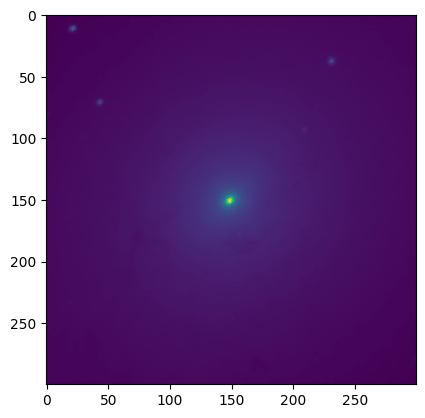

In [ ]:
plt.imshow(M31_pixels)

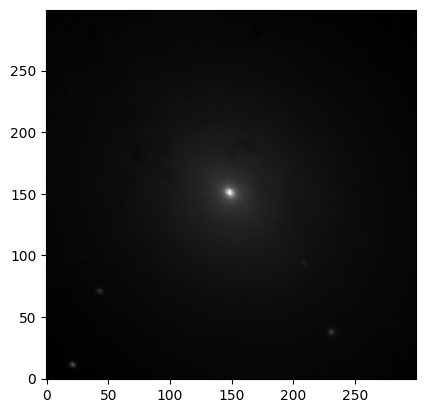

In [ ]:
#in order to invert the axis and start from lower value
plt.imshow(M31_pixels, cmap = 'gray', origin = 'lower')

Using DSS2 Survey to display the M31 in a zoomed out version

In [ ]:
#in order to get a zoomed out version, we are changing the pixel size and radius.
#by default the pixel size is (300,300)
#convert the radius into arc minutes - import astropy

import astropy.units as u

hdu_new = SkyView.get_images('M31', 'DSS2 Blue',
                             pixels = 600,
                             radius = 150*u.arcmin)
hdu_new

[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x790a1db6d960>]]

In [ ]:
hdu_new = SkyView.get_images('M31', 'DSS2 Blue',
                             pixels = 600,
                             radius = 150*u.arcmin)[0][0]
M31_DSS2_Blue_Pixels = hdu_new.data
#numpy array
type(M31_DSS2_Blue_Pixels)
#shape is 600 pixels
M31_DSS2_Blue_Pixels.shape

(600, 600)

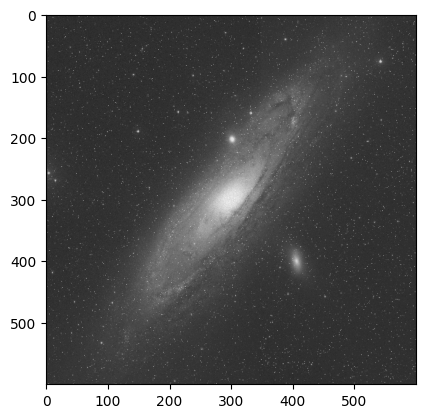

In [ ]:
plt.imshow(M31_DSS2_Blue_Pixels, cmap = 'gray')

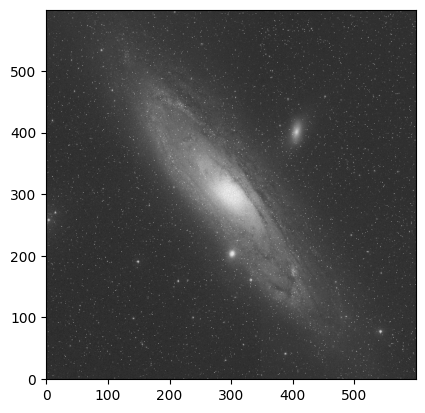

In [ ]:
plt.imshow(M31_DSS2_Blue_Pixels, cmap = 'gray', origin = 'lower')

Create our own FITS File

In [ ]:
# Import fits from io module of astropy
from astropy.io import fits

In [ ]:
''' Steps to create our own FITS file'''
# Create HDUList() to store different HDUs
hdulist = fits.HDUList()

# Create the PrimaryHDU()
hdu1 = fits.PrimaryHDU()

# Add the pixels data
hdu1.data = M31_pixels

# Add the Meta data
hdu1.header = M31_Header

# Append the PrimaryHDU to the HDUList
hdulist.append(hdu1)
hdulist

#Generate the FITS Data
hdulist.writeto('Dummy_FITS_File.fits', overwrite = 'True')

In [ ]:
#to open the fits file generated
#path is copied from under files
my_fits = fits.open('/content/Dummy_FITS_File.fits')
my_fits

In [ ]:
my_fits[0].header

SIMPLE  =                    T / Written by SkyView Fri Feb 02 09:33:46 EST 2024
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  300 / Width of image                                 
NAXIS2  =                  300 / Height of image                                
CRVAL1  =              10.6847 / Reference longitude                            
CRVAL2  =              41.2688 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                150.5 / X reference pixel                              
CRPIX2  =                150

In [ ]:
my_fits[0].data

array([[5.4453125, 5.453125 , 5.4453125, ..., 7.4609375, 7.515625 ,
        7.4140625],
       [5.4375   , 5.453125 , 5.421875 , ..., 7.625    , 7.4453125,
        7.4453125],
       [5.4765625, 5.359375 , 5.4609375, ..., 7.4375   , 7.5625   ,
        7.46875  ],
       ...,
       [7.3984375, 7.3984375, 7.546875 , ..., 5.53125  , 5.671875 ,
        5.7578125],
       [7.46875  , 7.6171875, 7.5859375, ..., 5.6640625, 5.671875 ,
        5.5625   ],
       [7.53125  , 7.5078125, 7.5859375, ..., 5.53125  , 5.59375  ,
        5.5546875]], dtype=float32)

Pixel Scaling on M31 Data

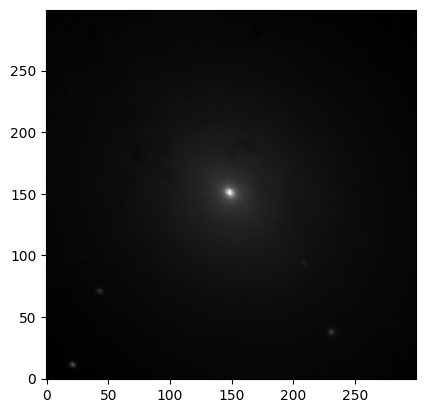

In [ ]:
#Visualizing M31
plt.imshow(M31_pixels, cmap = 'gray', origin ='lower')

In [ ]:
#To perform further pixel processing on the above img - we need the statistical values on the pixel data
import numpy as np

#min, max, mean, std of the data
print('Summary Statistics of M31 Galaxy:')
print(f'Minimum value: {np.min(M31_pixels)}')
print(f'Maximum value: {np.max(M31_pixels)}')
print(f'Mean value: {np.mean(M31_pixels)}')
print(f'Standard Deviation value: {np.std(M31_pixels)}')

'''in the header data value if we check, the xference val and yreference val both points to 150.5
suggesting that the telescope focused on the center of M31 - the bright spot in the img is the center'''

'''from the summary statistics it is clear that the min and avg are on the lower side and the max is the rhs
higher end. this could mean that the reason for the high max value - could be the noise present in the image'''

Summary Statistics of M31 Galaxy:
Minimum value: 5.359375
Maximum value: 178.0
Mean value: 13.329444885253906
Standard Deviation value: 6.3922271728515625


'from the summary statistics it is clear that the min and avg are on the lower side and the max is the rhs\nhigher end. this could mean that the reason for the high max value - could be the noise present in the image'

In [ ]:
#to print pixel value at the center, from xference and yreference we know center is 150.5
#cannot pass float values
#even at the center the pixel is only 126.5 which is far away from 178
#indicates presence of noise
M31_pixels[151,151]

126.5

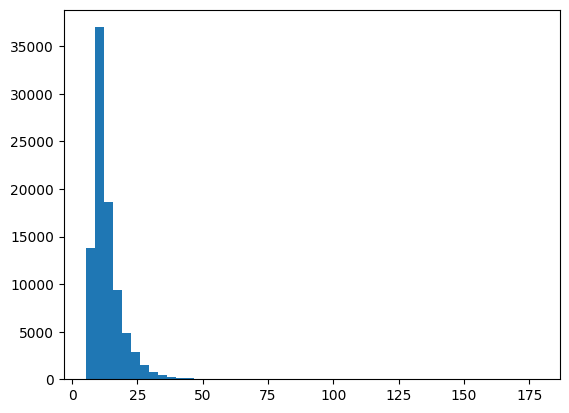

In [ ]:
#to get the histogram representation of M31
#flattening the 2d M31 pixels to 1d using flat
plt.hist(M31_pixels.flat, bins = 50)
plt.show()
#from this graph we can see that the pixel values are skewed towards the left

MinMax Pixel Scaling

1. Intensity Normalization or Linear Scaling or MinMax Scaling
x(scaled) = (x - x(min)) / (x(max) - x(min)) , where x = array

In [ ]:
#Common Function to plot the scaled pixel arrays
def plotpixelsfn(pixel_array, title, color):
  plt.imshow(pixel_array, cmap = 'gray', origin = 'lower')
  plt.title(title, color = color, weight = 'bold', fontsize = 12, font = 'sans serif')
  plt.axis('off')
  #plt.show()

In [ ]:
#Function to compare the original array and the scaled array
def comparepixelsfn(scaled_array, title):
  plt.subplot(1,2,1)
  plotpixelsfn(M31_pixels, title = "Original Image", color = 'black')
  plt.subplot(1,2,2)
  plotpixelsfn(scaled_array, title = title, color = 'royalblue')
  plt.tight_layout()
  plt.show()

In [ ]:
#Function to normalize
def minmaxscalingfn(pixel_array):
  num = pixel_array - np.min(pixel_array)
  den = np.max(pixel_array) - np.min(pixel_array)
  scaled_array = num / den
  return (scaled_array)

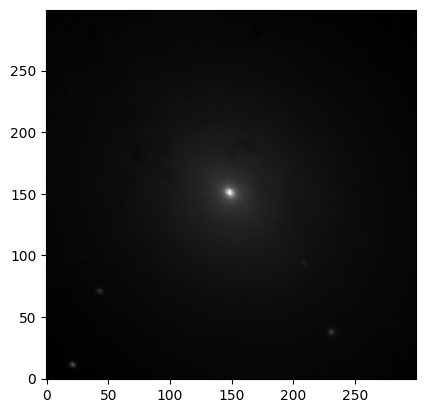

In [ ]:
#Normalizing the M31 and visualizing it
minmax_array = minmaxscalingfn(M31_pixels)
plt.imshow(minmax_array, cmap = 'gray', origin = 'lower')

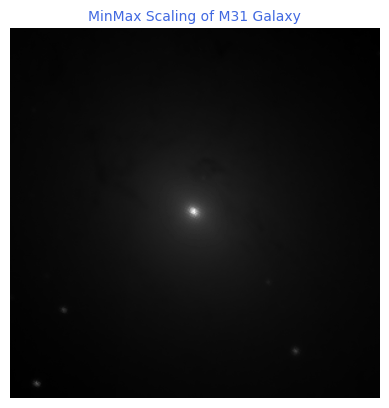

In [ ]:
#Normalizing the M31 and visualizing it
minmax_array = minmaxscalingfn(M31_pixels)
plotpixelsfn(minmax_array, title = 'MinMax Scaling of M31 Galaxy', color = 'royalblue')

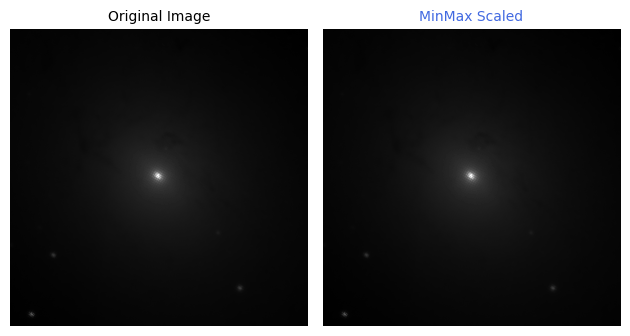

In [ ]:
#Normalizing the M31 and comparing the original and scaled arrays
minmax_array = minmaxscalingfn(M31_pixels)
comparepixelsfn(minmax_array, title = 'MinMax Scaled')

Other Scaling Methods
  1. Z Standarization or Standard Scaling Method
  z = x - mean / std

In [ ]:
#Function for z scaling
def zscalefn(pixel_array):
  num = pixel_array - np.mean(pixel_array)
  den = np.std(pixel_array)
  scaled_array = num/den
  return(scaled_array)

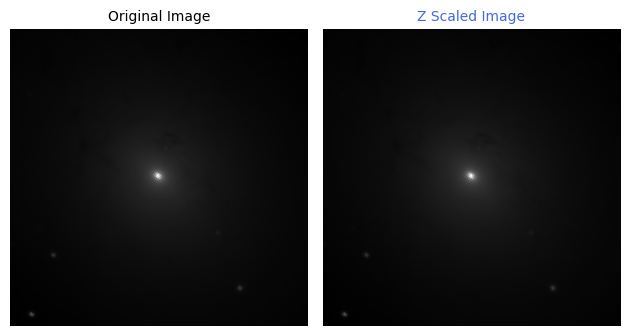

In [ ]:
#Visualize the M31
zscaled_array = zscalefn(M31_pixels)
comparepixelsfn(zscaled_array, title = 'Z Scaled Image')

2. Log Standarization
Log Normalization - taking log of pixel values and plotting the same

In [ ]:
#Function to take log values
def log_normalizefn(pixel_array):
  return np.log(pixel_array)

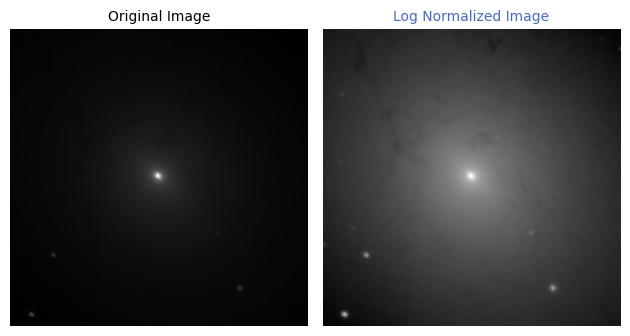

In [ ]:
#Visualize the log normalisation of M31
log_normarray = log_normalizefn(M31_pixels)
comparepixelsfn(log_normarray, title = 'Log Normalized Image')

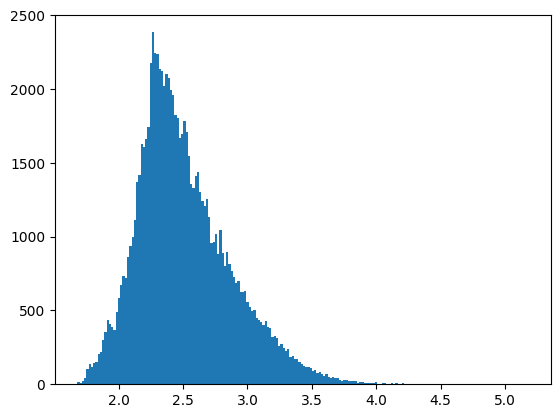

In [ ]:
#Create a histogram of the log values
plt.hist(log_normarray.flat , bins = 200)
plt.show()

In [ ]:
log_normarray.shape
#M31 originally is 300x300 that same size will be reflected here also

(300, 300)

3. Square Root

In [ ]:
def sqrt_scalingfn(pixel_array):
  return np.sqrt(pixel_array)

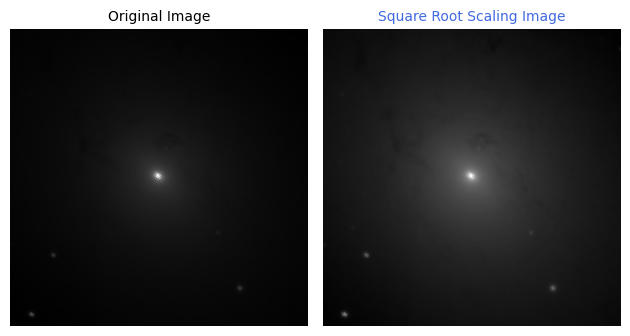

In [ ]:
sqrt_array = sqrt_scalingfn(M31_pixels)
comparepixelsfn(sqrt_array, title = 'Square Root Scaling Image')

ZScale Interval

In [ ]:
#clipping of an array to the min and max values given, anything less than min changed to min and values above max, changed to max

#ZScaleInterval from visualization module of astropy
from astropy.visualization import ZScaleInterval

In [ ]:
#Create the object of zscaleinterval
z = ZScaleInterval()

In [ ]:
#Since we created object of ZScaleInterval, we can get the limits of the object
z1 , z2 = z.get_limits(log_normarray)
print(f'Minimum: {z1}')
print(f'Maximum: {z2}')

np.min(log_normarray)
#1.6788 is the min - will be converted to 1.688 after clipping. same for max value

Minimum: 1.6889997720718384
Maximum: 4.447910199027213


1.6788473

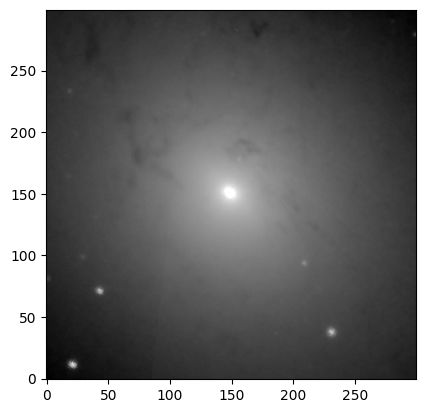

In [ ]:
#Plotting M31 using the z values. saving the img to clip the lognormarray
img = plt.imshow(log_normarray, vmin = z1, vmax = z2, cmap = 'gray', origin = 'lower')
plt.show()

In [ ]:
#Convert img to array - converting to unsigned int 8 bit
#it also has other components to it, but we take the first index array value
img.make_image(renderer = None)

(array([[[  0,   0,   0, 255],
         [  0,   0,   0, 255],
         [  0,   0,   0, 255],
         ...,
         [ 30,  30,  30, 255],
         [ 30,  30,  30, 255],
         [ 29,  29,  29, 255]],
 
        [[  0,   0,   0, 255],
         [  0,   0,   0, 255],
         [  0,   0,   0, 255],
         ...,
         [ 30,  30,  30, 255],
         [ 29,  29,  29, 255],
         [ 29,  29,  29, 255]],
 
        [[  0,   0,   0, 255],
         [  0,   0,   0, 255],
         [  0,   0,   0, 255],
         ...,
         [ 30,  30,  30, 255],
         [ 30,  30,  30, 255],
         [ 29,  29,  29, 255]],
 
        ...,
 
        [[ 29,  29,  29, 255],
         [ 30,  30,  30, 255],
         [ 30,  30,  30, 255],
         ...,
         [  3,   3,   3, 255],
         [  4,   4,   4, 255],
         [  4,   4,   4, 255]],
 
        [[ 30,  30,  30, 255],
         [ 31,  31,  31, 255],
         [ 31,  31,  31, 255],
         ...,
         [  3,   3,   3, 255],
         [  3,   3,   3, 255],
    

In [ ]:
#Convert img to array - converting to unsigned int 8 bit
image_array = img.make_image(renderer = None)[0]
image_array

array([[[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [ 30,  30,  30, 255],
        [ 30,  30,  30, 255],
        [ 29,  29,  29, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [ 30,  30,  30, 255],
        [ 29,  29,  29, 255],
        [ 29,  29,  29, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [ 30,  30,  30, 255],
        [ 30,  30,  30, 255],
        [ 29,  29,  29, 255]],

       ...,

       [[ 29,  29,  29, 255],
        [ 30,  30,  30, 255],
        [ 30,  30,  30, 255],
        ...,
        [  3,   3,   3, 255],
        [  4,   4,   4, 255],
        [  4,   4,   4, 255]],

       [[ 30,  30,  30, 255],
        [ 31,  31,  31, 255],
        [ 31,  31,  31, 255],
        ...,
        [  3,   3,   3, 255],
        [  3,   3,   3, 255],
        [  2,   2,   2, 255]],

       [[ 30

In [ ]:
image_array.shape
#we need to convert this into 300 x 300

(370, 370, 4)

In [ ]:
#using unsampled will keep the dimensions as the original val
'''4 shows the num of channels. in this case - Red, Green, Blue and Alpha Channels
Alpha refers to image opacity (val from 0 to 255) 0 is completely opaque'''
image_array = img.make_image(renderer = None, unsampled = True)[0]
image_array.shape

(300, 300, 4)

Convert the 4 Channel Image to Grayscale

In [ ]:
#import open cv2 library by default present in google colab
import cv2

In [ ]:
#Converting 4 channel img to grayscale. need to pass flag - from what to what
''' in cv2, instead of RGBA - it is BGRA. for open cv2 the fn is BGRA to Grayscale'''
gray_array = cv2.cvtColor(image_array, cv2.COLOR_BGRA2GRAY)

In [ ]:
#Converted to grayscale and 4 channels removed
gray_array.shape

(300, 300)

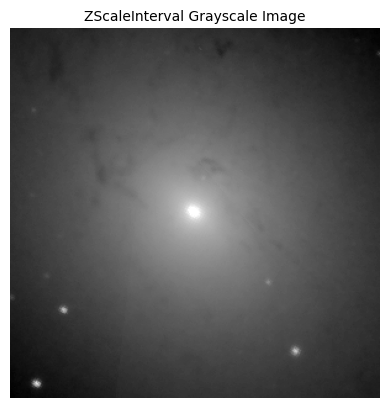

In [ ]:
#Plotting this array - similar to the img above
plotpixelsfn(gray_array, title = 'ZScaleInterval Grayscale Image', color = 'black')

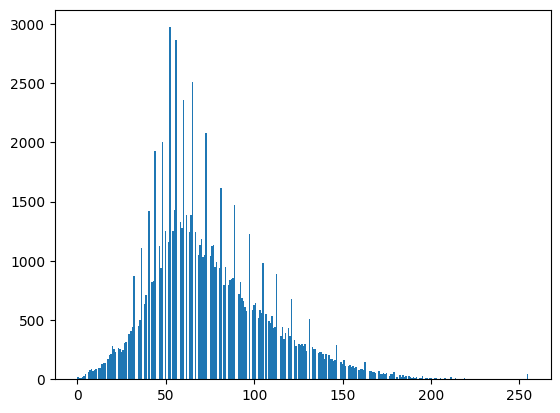

In [ ]:
#histogram distribution of gray array
plt.hist(gray_array.flat, bins = 300)
plt.show()

In [ ]:
grayscale_zint_array = gray_array

Convolution Operation

Denoising using Gaussian
Technically blurring the image by removing noises (prerequisite to many filters) - known as Gaussian Smoothing

Convolution
Each pass of the kernel over the image is called as stride - if stride = 1 then will skip one unit and pass over the image. if stride = 2, then will skip 2 units and pass over the image.
Padding around the outer layer of the image can be filled with zeroes or with the image values itself. if the img size is 5x5 - then with padding it would be 7x7 and after convolution the output will be 5x5

For the kernel, the center val would be high and the outer layer val would be low

In [ ]:
#convolution 2D filter from scipy's signal module
from scipy.signal import convolve2d

In [ ]:
#Generate your kernel/filter
#create a tuple of ones and divide that by 25 - so that summation comes to 1 - 0.04x25 = 1
#(5,5) will create a 5x5 array
kernel = np.ones((5,5))/25
kernel
#if kernel is 3x3, then divide by 9

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

In [ ]:
#Create a gaussian kernel
gaussian_kernel = np.array ([[1/16, 1/8, 1/16],
                             [1/8, 1/4, 1/8],
                             [1/16, 1/8, 1/16]
                             ])
gaussian_kernel

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

In [ ]:
#Convolution using simple kernel
#mode = 'same - for the padding
simple_convolvedimg = convolve2d(M31_pixels, kernel, mode = 'same')

#Convolution using gaussian kernel
gaussian_convolvedimg = convolve2d(M31_pixels, gaussian_kernel, mode = 'same')

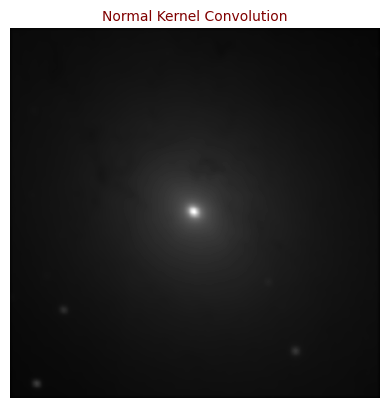

In [ ]:
#Plotting both images
plotpixelsfn(simple_convolvedimg, title = 'Normal Kernel Convolution', color = 'maroon')

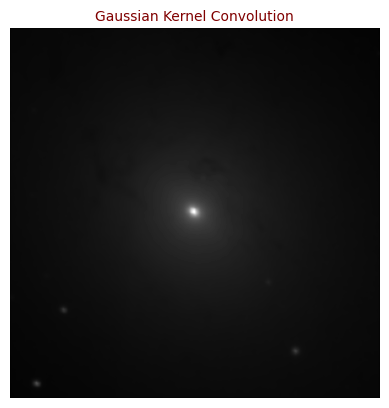

In [ ]:
plotpixelsfn(gaussian_convolvedimg, title = 'Gaussian Kernel Convolution', color = 'maroon')

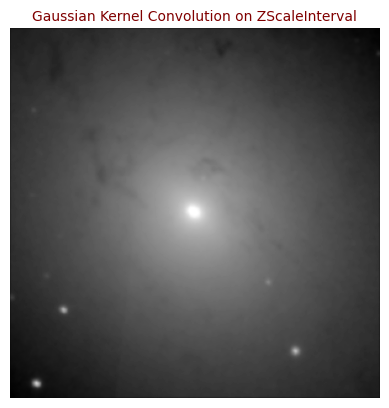

In [ ]:
#Using grayscale of M31 with gaussian kernel
convolved_grayscale = convolve2d(grayscale_zint_array, gaussian_kernel, mode = 'same')

plotpixelsfn(convolved_grayscale, title = 'Gaussian Kernel Convolution on ZScaleInterval', color = 'maroon')
#in this image - the noises are removed by adding blur

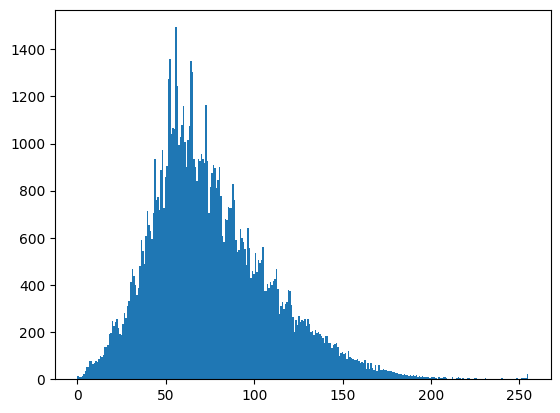

In [ ]:
#Histogram for the same
plt.hist(convolved_grayscale.flat, bins = 300)
plt.show()

Enhacing the Features
  1. Meijering Filter
  2. Sato Filter

In [ ]:
#Enhancing the linear features on M31 data

#using the convolved grayscale for further processing
#Creating a spectral list
SPECTRAL_LIST  = ["gray","jet","hot","prism","nipy_spectral"]

In [ ]:
#importing meijering and sato filers from skimage
from skimage.filters import meijering, sato

In [ ]:
#filters are implemented on convolved grayscale image
meijering_output = meijering(convolved_grayscale)
sato_output = sato(convolved_grayscale)

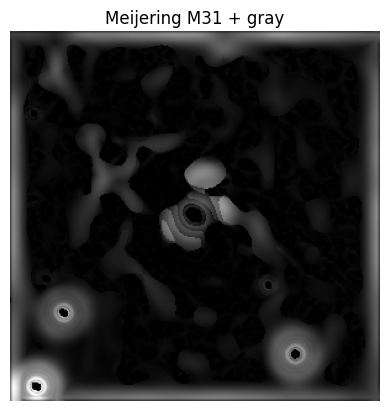

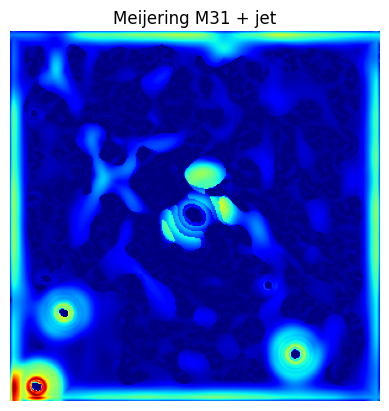

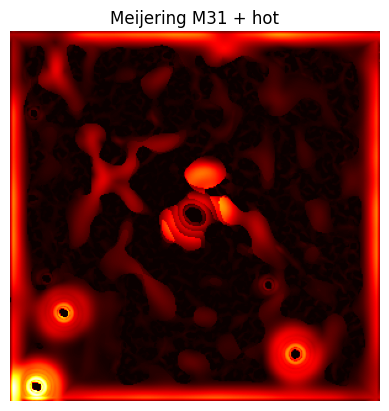

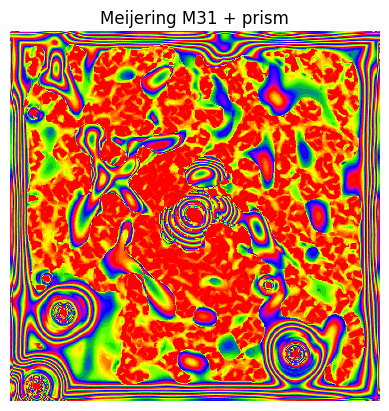

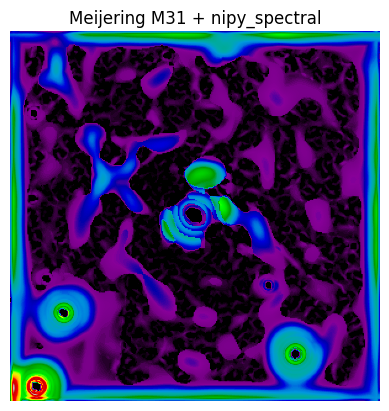

In [ ]:
#for each element in the spectral list, visualize the output for the meijering and sato filter
for colormap in SPECTRAL_LIST:
  plt.imshow(meijering_output, cmap = colormap, origin = 'lower')
  plt.title(f'Meijering M31 + {colormap}')
  plt.axis('off')
  plt.show()

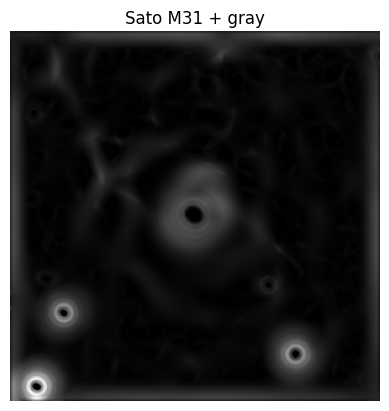

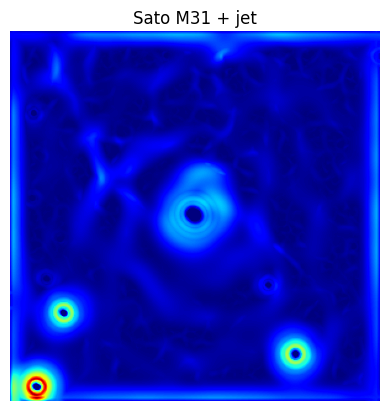

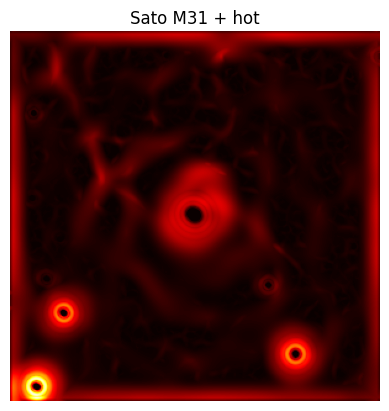

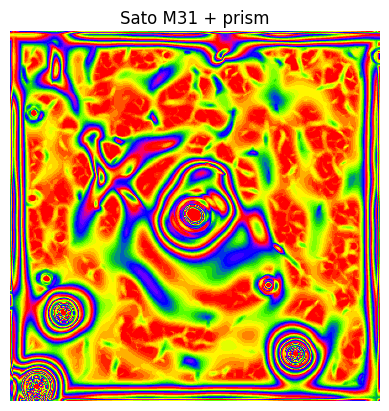

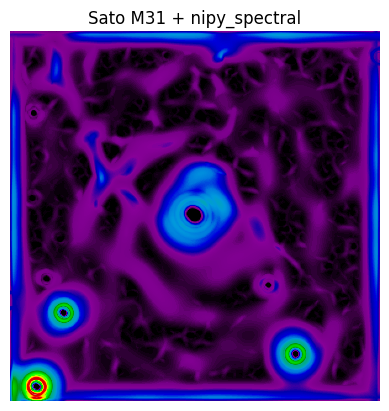

In [ ]:
for colormap in SPECTRAL_LIST:
  plt.imshow(sato_output, cmap = colormap, origin = 'lower')
  plt.title(f'Sato M31 + {colormap}')
  plt.axis('off')
  plt.show()

Feature Detection and Extraction
skimage.features = used mainly for feature detectio and extraction eg. texture analysis corners, etc

Corner Foerstner
A fast operator for detection and precise location of distinct points, corners and centers of circular features

In [ ]:
#Corner Foerstner
from skimage.feature import corner_foerstner

In [ ]:
#log scaled pixels or standard scale pixels or normalized pixels
#this will return 2 outputs - check documentation for further info
#one is error and the other one is roundness of error
feature_output = corner_foerstner(convolved_grayscale)
feature_output[1]

array([[0.4989641 , 0.21946652, 0.20260812, ..., 0.24883013, 0.65938198,
        0.71467819],
       [0.39800763, 0.23215066, 0.14497339, ..., 0.54766745, 0.90813068,
        0.66235114],
       [0.24457695, 0.17733225, 0.10416085, ..., 0.98735337, 0.55825765,
        0.25356002],
       ...,
       [0.22429728, 0.51726484, 0.96709646, ..., 0.6867379 , 0.62290977,
        0.29146722],
       [0.64334682, 0.9009524 , 0.55832027, ..., 0.49465811, 0.75665701,
        0.5648419 ],
       [0.71794373, 0.66759447, 0.2532344 , ..., 0.24465286, 0.53700323,
        0.60483135]])

In [ ]:
type(feature_output)

tuple

In [ ]:
len(feature_output)

2

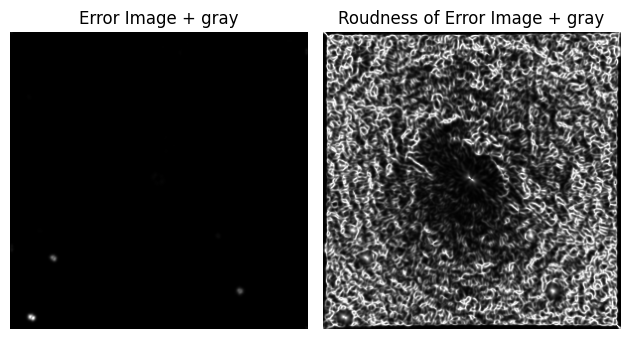

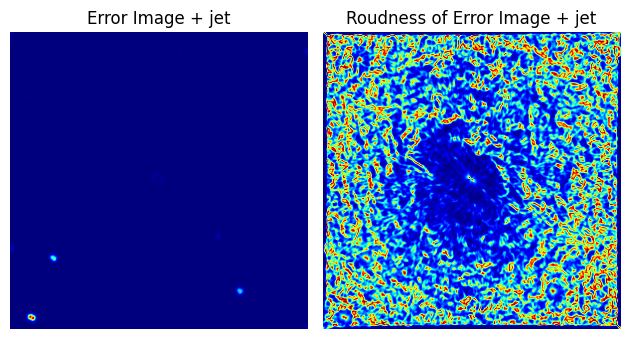

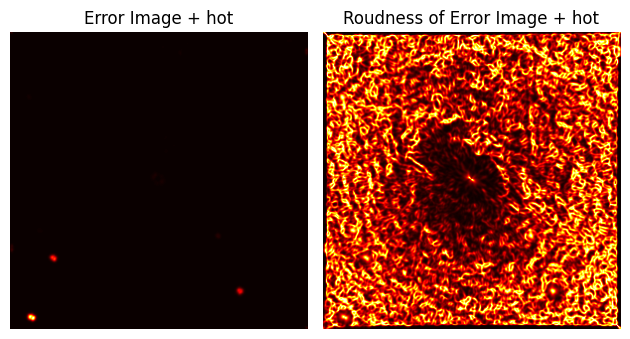

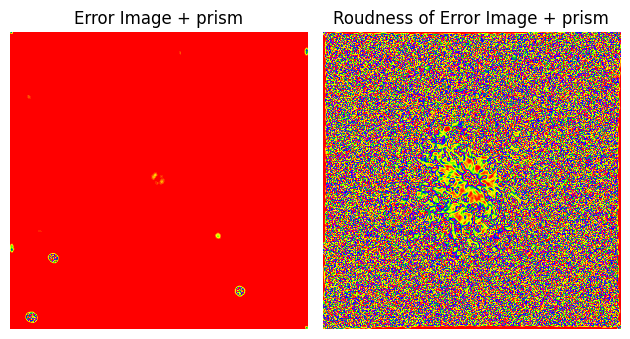

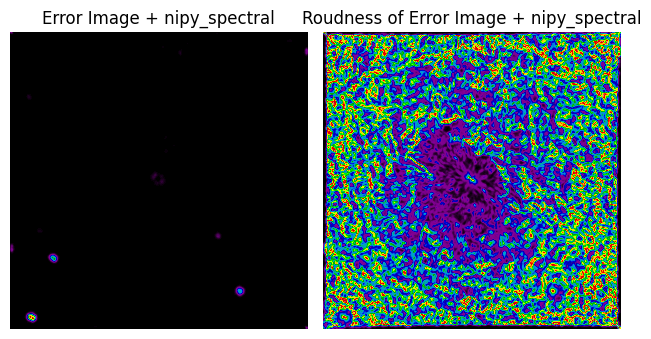

In [ ]:
#Subplot visualization
for colormap in SPECTRAL_LIST:
  plt.subplot(1,2,1)
  plt.imshow(feature_output[0], cmap = colormap, origin = 'lower')
  plt.title(f'Error Image + {colormap}')
  plt.axis('off')

  plt.subplot(1,2,2)
  plt.imshow(feature_output[1], cmap = colormap, origin = 'lower')
  plt.title(f'Roudness of Error Image + {colormap}')
  plt.axis('off')

  plt.tight_layout()
  plt.show()

In [ ]:
#MultiScale Basic Features - will give the local features for a single or multi channel nd image
#intensity, gradient intensity and local structure are computed at different scales due to Gaussian Blurring
from skimage.feature import multiscale_basic_features as mbf

In [ ]:
newfeatureimg = mbf(convolved_grayscale)

In [ ]:
type(newfeatureimg)

numpy.ndarray

In [ ]:
newfeatureimg.shape
#24 local features have been extracted from convolved grayscale

(300, 300, 24)

In [ ]:
P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24 = cv2.split(newfeatureimg)
#since there are 24 features we created 24 variables to store the split features

In [ ]:
#Creating a list to store each feature
Pixelslist = [P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24]

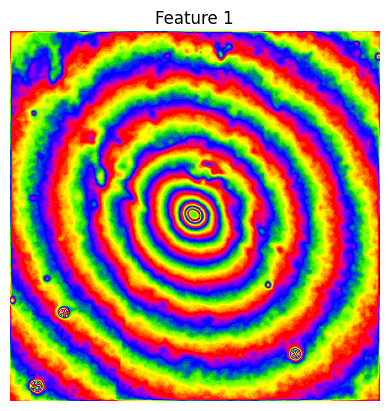

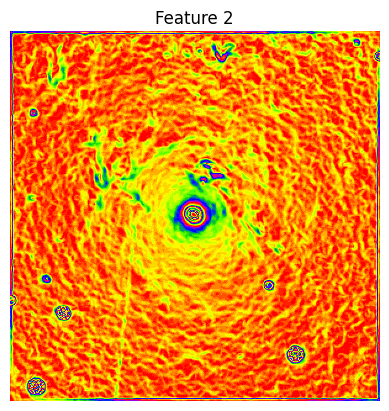

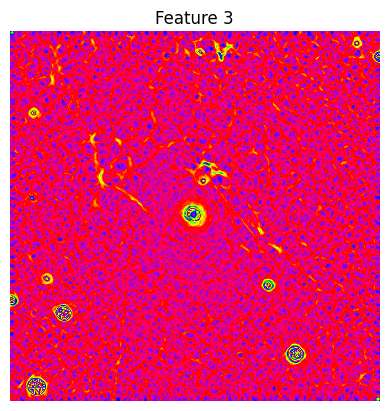

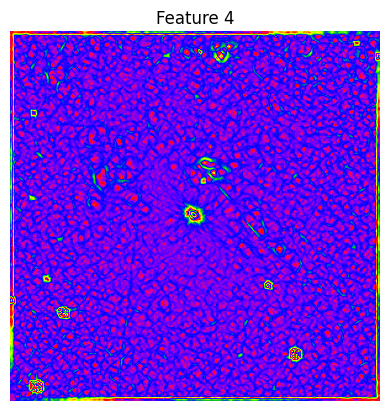

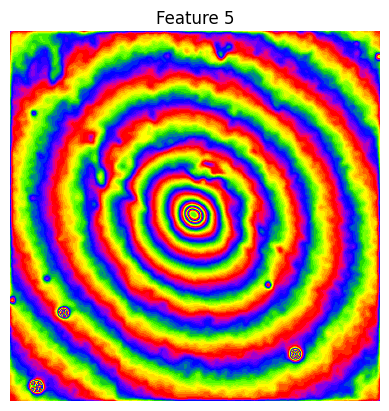

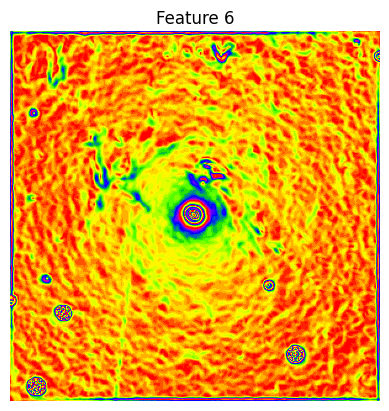

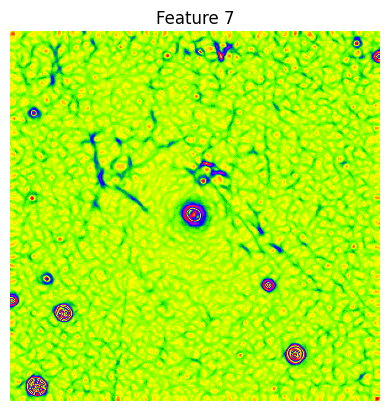

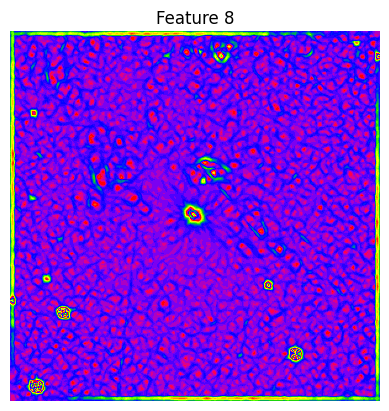

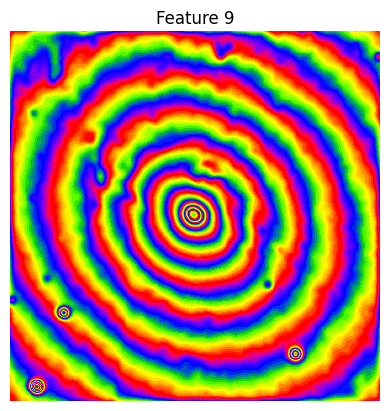

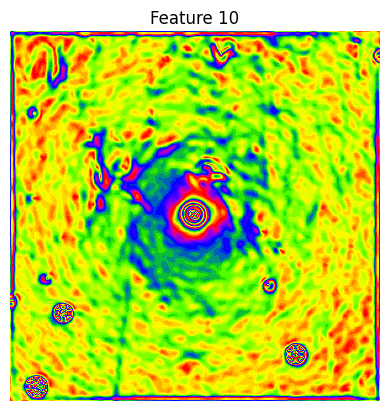

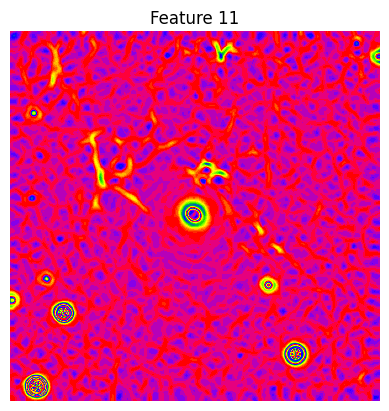

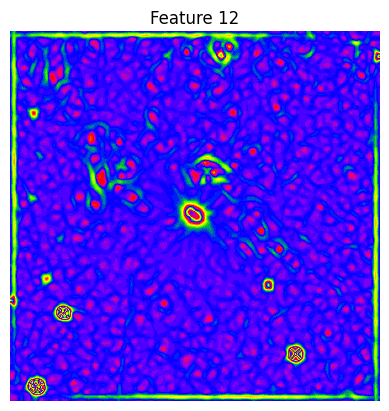

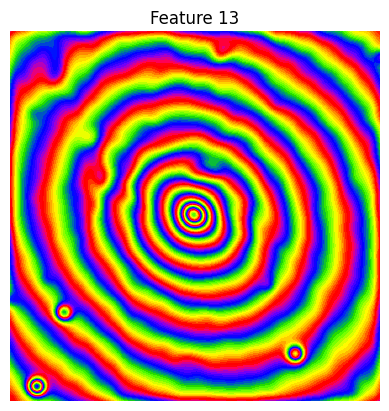

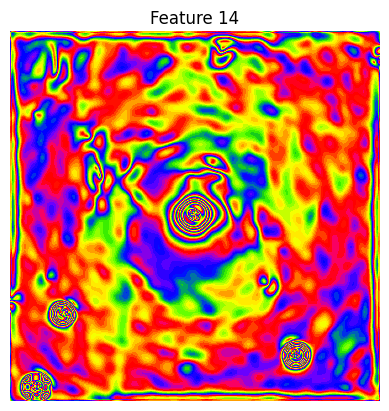

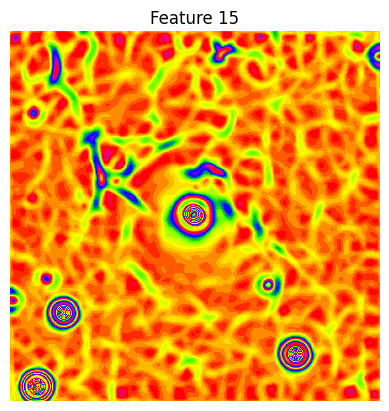

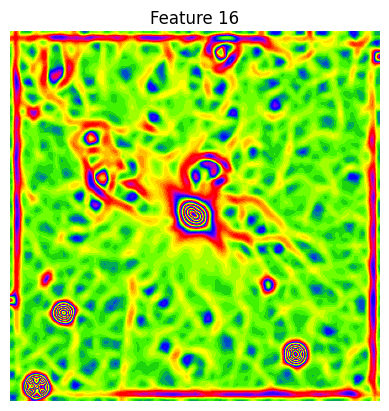

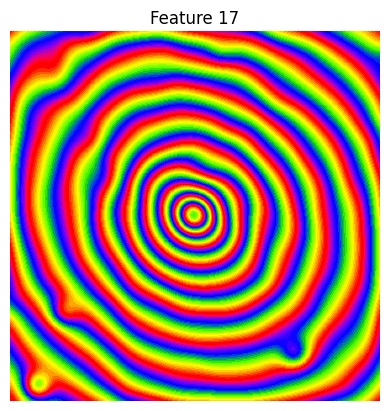

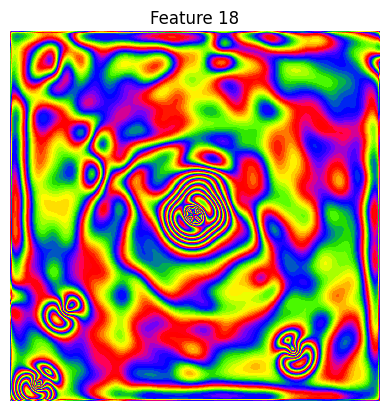

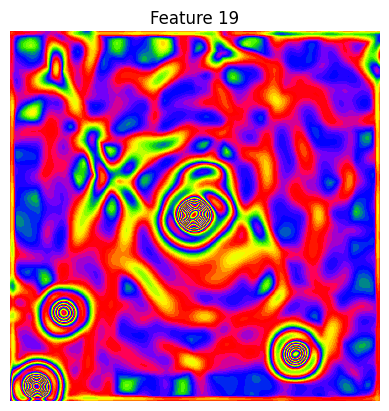

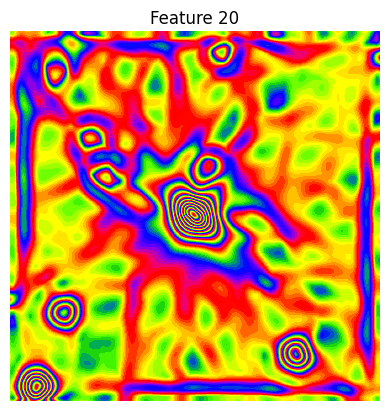

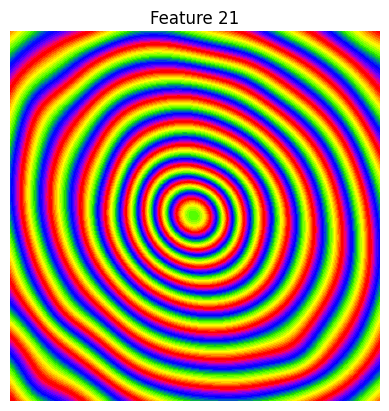

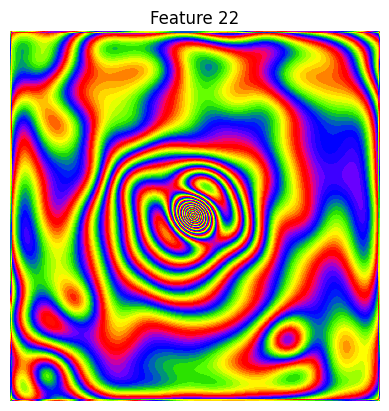

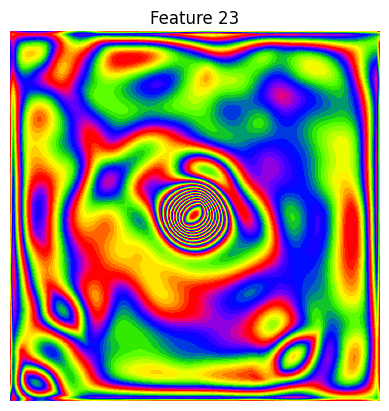

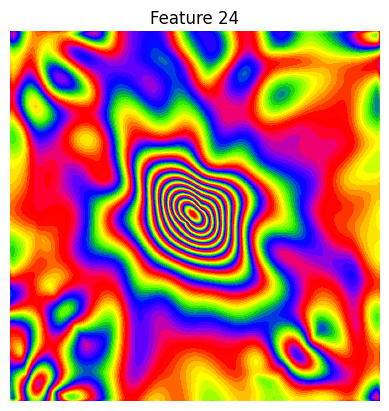

In [ ]:
#visualizing each channel using prism spectral
for i, features in enumerate(Pixelslist):
  plt.imshow(features, cmap = "prism", origin = 'lower')
  plt.title(f'Feature {i+1}')
  plt.axis('off')
  plt.show()

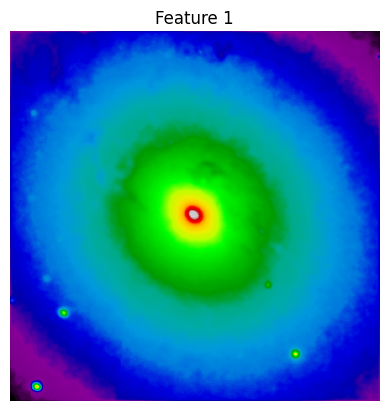

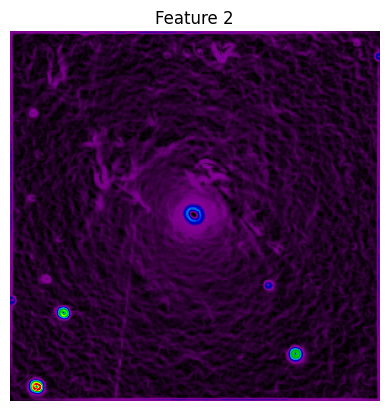

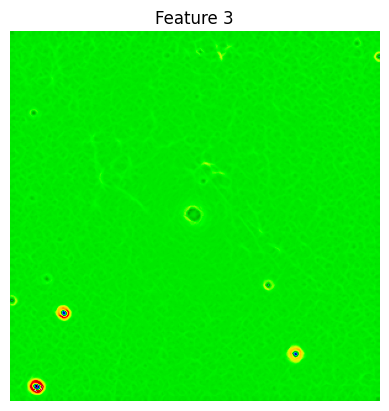

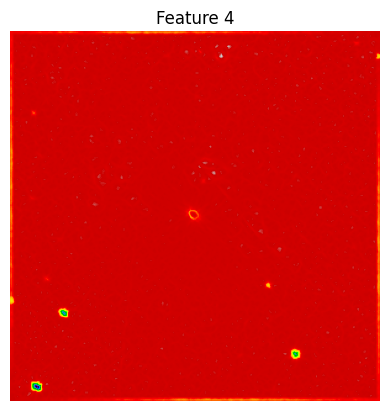

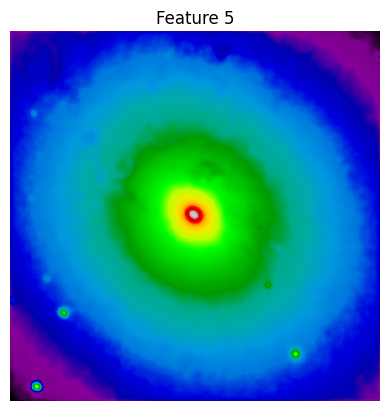

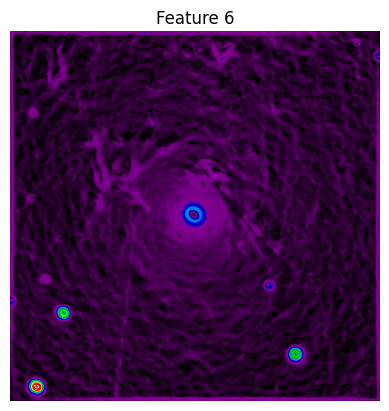

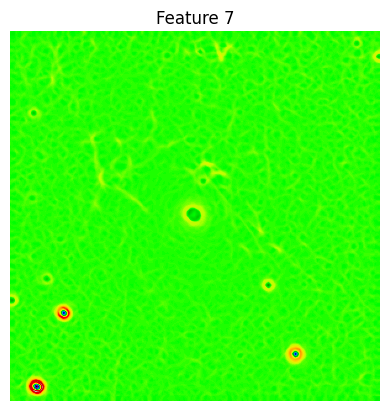

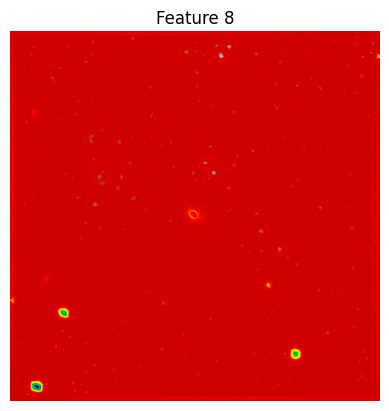

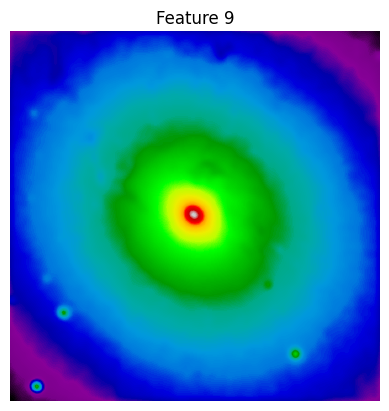

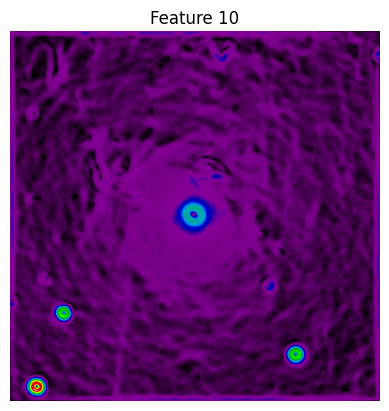

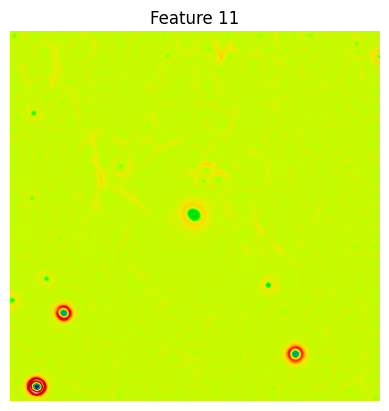

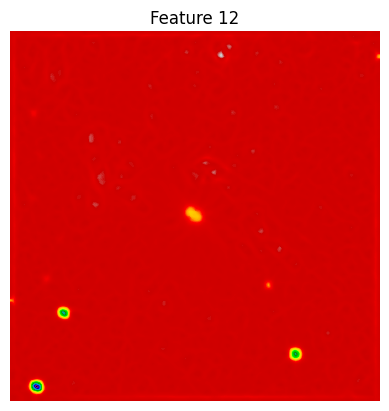

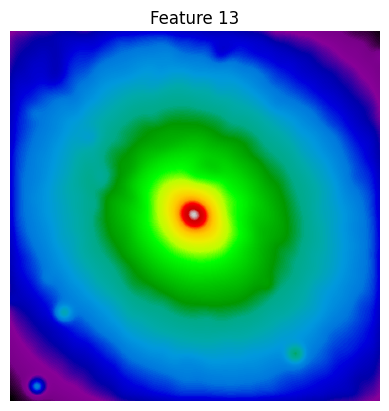

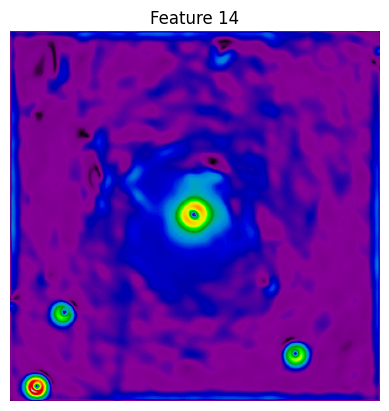

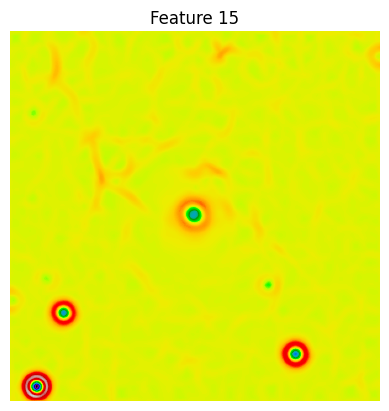

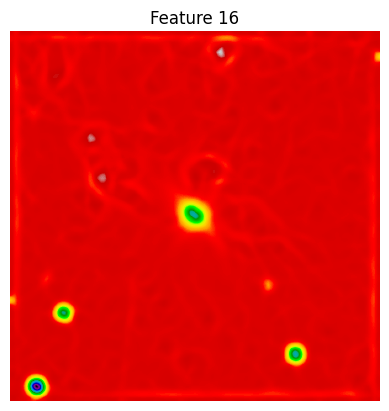

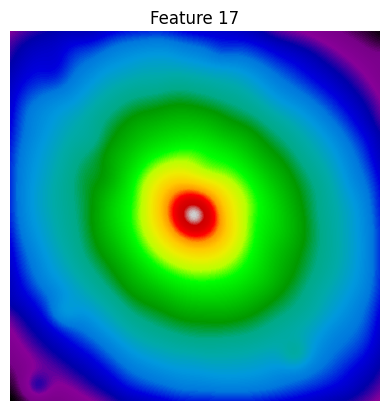

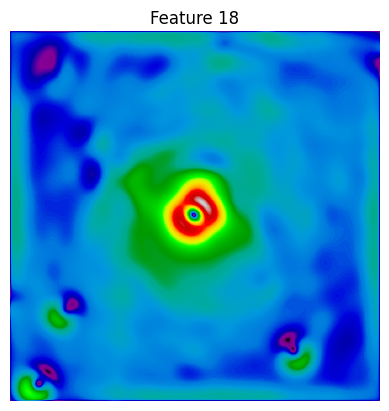

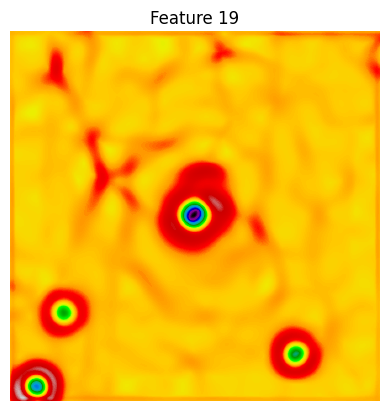

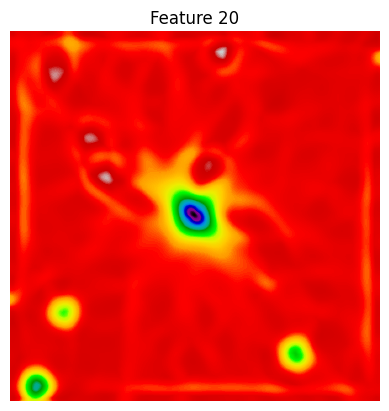

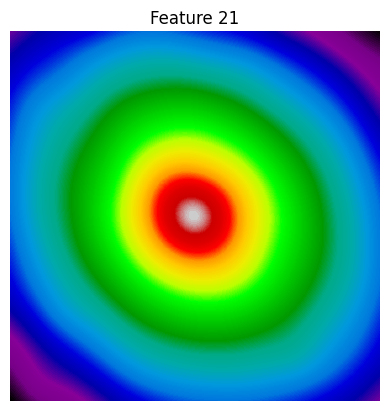

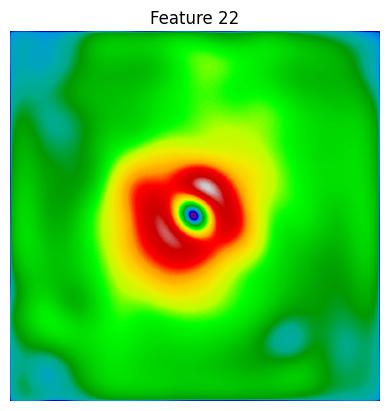

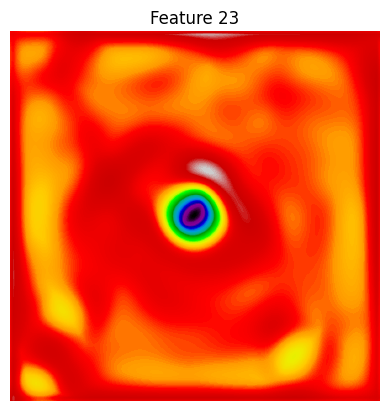

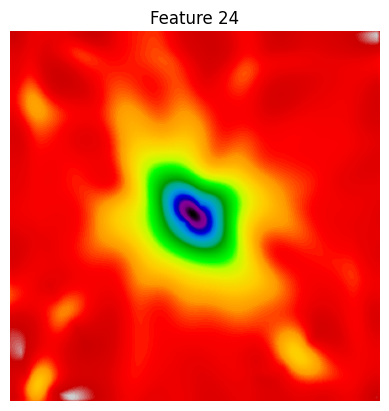

In [ ]:
#visualizing each channel using nipy spectral
for i, features in enumerate(Pixelslist):
  plt.imshow(features, cmap = "nipy_spectral", origin = 'lower')
  plt.title(f'Feature {i+1}')
  plt.axis('off')
  plt.show()